# Workflow Notebook Canvas-Nbgrader

### Requirements:
* Plagiarism check is only possible on Mac or Linux, not on Windows unfortunately, because the module `compare50` doesn't work on Windows.
* This notebook has to be in the folder of the course, so next to the folders source, release etc. Jupyter also has to be started in this folder.
* Only use one notebook per assignment, and give the notebook and assignment the same name.

## Start

In [1]:
%matplotlib inline
import urllib.request
# urllib.request.urlretrieve(
#     "https://raw.githubusercontent.com/jaspervdh96/Workflow/master/Workflow_functies.py",
#     "Workflow_functies.py")
%run Workflow_functies.py
course = Course()      

Logged in succesfully
Course name: Data Science
Course code: 5072DASC6Y
Canvas course id: 1831
Username: Maarten Marx


Button(description='Change course/user', layout=Layout(width='300px'), style=ButtonStyle())

In [2]:
course.show_course_settings();

Order                        Resits  Weight  \
Group       Assignment                                                     
Assignments AssignmentWeek1      0                           NaN    6.67   
            AssignmentWeek2      1                           NaN    6.67   
            AssignmentWeek3      2                           NaN    6.67   
            AssignmentWeek5      4                           NaN    6.67   
            AssignmentWeek6      5                           NaN    6.67   
            AssignmentWeek7      6                           NaN    6.67   
Deeltoetsen Deeltoets1           3  [HerDeeltoets1, Hertentamen]   30.00   
            Deeltoets2           7  [HerDeeltoets2, Hertentamen]   30.00   
Resits      HerDeeltoets1        8                           NaN     NaN   
            HerDeeltoets2        9                           NaN     NaN   
            Hertentamen         10                           NaN     NaN   

                             Minimal Grade  Points needed for a 10  
Group       Assignment                                              
Assignments AssignmentWeek1            0.0                    12.0  
            AssignmentWeek2            0.0                    18.0  
            AssignmentWeek3            0.0                     9.0  
            AssignmentWeek5            0.0                    11.0  
            AssignmentWeek6            0.0                    11.0  
            AssignmentWeek7            0.0                    20.0  
Deeltoetsen Deeltoets1                 1.0                    17.0  
            Deeltoets2                 2.5                     7.5  
Resits      HerDeeltoets1              1.5                    12.0  
            HerDeeltoets2              1.0                    14.0  
            Hertentamen                1.0                    18.0

To pass a course a student has to
	have a minimal mean grade of 1.0 for Assignments
	have a minimal mean grade of 1.0 for Deeltoetsen
	have a minimal weighted mean grade of 5.5 for all groups


## Adding the students to the nbgrader database

In [3]:
course.button_db()

Button(description='Update the students in the database', layout=Layout(width='300px'), style=ButtonStyle())

# Assign Assignment
Will update the assignment file, create a student version and update the assignment in the database.

Will also create the assignment in Canvas if it does not yet exist. It however does not create the deadline, this should be done manually in Canvas.

In [4]:
course.assign_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Downloading and sorting files
This function wil automatically download all submissions affiliated with this assignment from Canvas, and place them in the right folder for nbgrader.

Alternatively, this function also runs zip collect . This can be used if the files don't have to be downloaded from Canvas (for example exams in testvision). Put the files (can be zipped) in the folder 
`downloaded/{assignment name}/archive`. Don't forget to change the regular expression in `nbgrader_config.py` to match the filenames. For more information see the [nbgrader website](https://nbgrader.readthedocs.io/en/stable/user_guide/managing_assignment_files_manually.html).


In [5]:
course.download_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Autograding

In [6]:
course.autograde_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Plagiarism

In [7]:
course.plagiat_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Visualisations

## Distribution of the grades
The interval is always `[begin, end)`, except for `[9.5,10.0]`

### Percentage of successful students

In principle, students who have been found suitable for the training because of their previous education or final exam (propaedeutic year) should be able to pass their exams. If this fails, the causes can be found, for example, in deficiencies in the exam or in education and / or due to insufficient effort from the students. In the propaedeutic phase, an exam with more than 30% fail marks points to non-student-related shortcomings in the exam or prior education. In the main phase, 90% of the students would have to pass an exam.

### Average score of 5% best students

With a good exam, the best students should have (almost) all the questions right. Because the best student can be an outlier, the average score of the 5% best students is a good indication of the quality of the exam. If the best students fail to answer (almost) all questions correctly, then there is probably a problem with the exam or education. The cesure determination of Cohen-Schotanus, whereby the average score of the 5% best students is taken as the reference point, corrects for this problem.

Source (Dutch): https://toetsing.uva.nl/toetscyclus/analyseren/tentamenanalyse/tentamenanalyse.html#anker-percentage-geslaagde-studenten

### Formula
$$grade = min\_grade + score * (10-min\_grade) / max\_score$$

In [8]:
course.grades_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

## Item analysis

### Rir value
The Rit value represents the distinctive character of an item and represents the correlation (often indicated with the letter R) between the item and the total score on the test (Rit).

The total score on a test also contains the score on the item with which you want to correlate. That distorts the correlation in a rosy way. The Rir value therefore indicates the correlation (R) between the item and the total score minus the score for the question in question (residual value). This is the Rir value. In this way a fairer representation is given of the distinctive character of an item.

A question has a high distinctive character (Rir more than 0.25) if students with a high score make up for the question and the students with a low score make a mistake. The item then differs between students who perform well and students who do not perform as well. If students of all levels score the same on a question, there is no distinctive character (Rir is 0). If low-scoring students have the right question and high-scoring students are not (Rir is negative), then something is probably wrong, such as an incorrect key or an unclear formulation of the assignment.

In [9]:
course.item_button();

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

## Statistics
### Cronbachs Alpha
The standard for the reliability of an exam depends on the purpose of the exam. If the exam is intended to determine the suitability of a student, a reliability of 0.80 or higher is desirable. This applies if all examinations have to be passed with a pass and compensation is not possible. When it comes to formative tests that only support learning, a reliability of 0.60 is sufficient. This is also the case with a compensatory examination regulation.

A number of comments can be made about reliability as an indicator of the quality of an exam:
*    The reliability is lower as the exam is more heterogeneous, ie it measures different types of knowledge and skills;
*    The reliability becomes lower the more homogeneous the group of students, ie when the differences in level of students are small. This can be determined by the difference in scores between the 5% best and 5% worst students.
*    The ratio for reliability is the lowest lower limit. In reality, the reliability can be higher.
*    Reliability increases if the exam contains more items.

Source (Dutch): http://toetsing.uva.nl/toetscyclus/analyseren/tentamenanalyse/tentamenanalyse.html

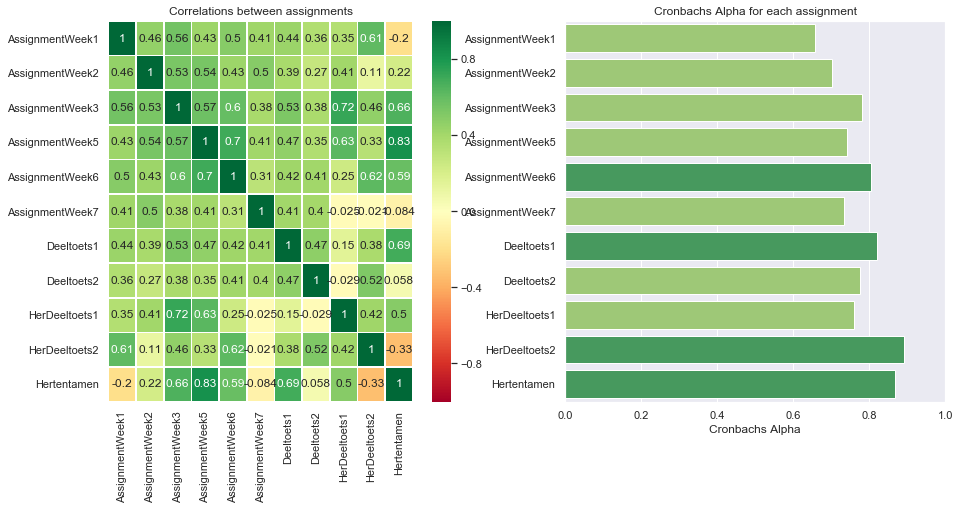

In [10]:
course.visualize_validity()

## Overview of the course

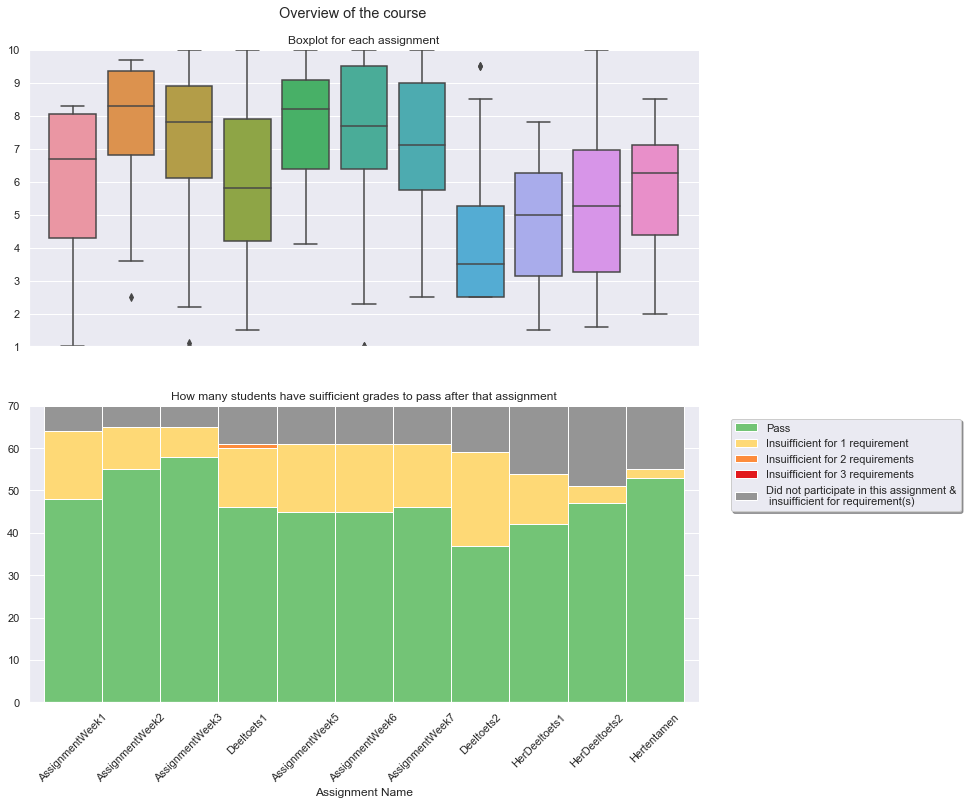

In [11]:
course.visualize_overview()

# Upload to Canvas
This will upload the grades to canvas. It will not fill in anything if there's no grade in nbgrader. Nor will it change grade 0 on Canvas.


## Feedback
If you select `feedback`, a [feedback page](https://nbgrader.readthedocs.io/en/0.2.x/user_guide/06_returning_feedback.html) will be uploaded to the submission on Canvas. This excludes the hidden tests and the traceback of errors/asserts. The traceback is excluded because often a part of the hidden tests is visible in it.

In [12]:
course.upload_button()

interactive(children=(Dropdown(description='assignment_name', options=('AssignmentWeek1', 'AssignmentWeek2', '…

# Final Grades

Grades have been exported to final_grades.csv


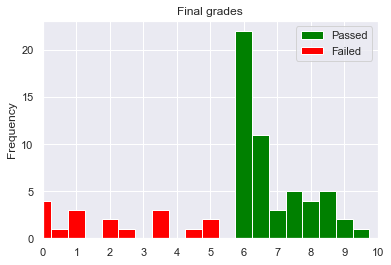

interactive(children=(Text(value='', description='column'), Button(description='Upload final grades', style=Bu…

In [13]:
course.final_grades()